In [138]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [139]:
df_ochem = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/ochem_vp.tsv', sep='\t')
print(len(df_ochem))
df_ochem = df_ochem.dropna(subset=[df_ochem.columns[2], df_ochem.columns[3],'Temperature'])
print(len(df_ochem))
#drop everything that has a comment (property)
df_ochem = df_ochem[df_ochem['comment (property)'].isnull()]
print(len(df_ochem))
df_ochem = df_ochem[df_ochem['comment (chemical)'].isnull()]
print(len(df_ochem))
#convert all temperatures to Kelvin

4999
4245
4200
4199


In [140]:
#change every = x to x for Temperature
df_ochem['Temperature'] = df_ochem['Temperature'].str.replace('=', '')
#make floats
df_ochem['Temperature'] = df_ochem['Temperature'].astype(float)

In [141]:
df_ochem['Temperature_K'] = df_ochem.apply(lambda row: row['Temperature'] + 273.15 if 'C' in row[df_ochem.columns[5]] else row['Temperature'], axis=1)
#keep only 298.15 K
df_ochem = df_ochem[df_ochem['Temperature_K'] == 298.15]
print(len(df_ochem))
df_ochem

3769


,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K
10,10,BrC1=CC=C(OC2=CC=C(Br)C=C2)C=C1,0.01,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,bd7d919f28db06e7964c92a6aeb2eed2,NaN,298.15
28,28,BrC1=CC(Br)=C(OC2=C(Br)C=C(Br)C=C2)C=C1,2.15E-4,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,209a33acbb259687fd4222d33441f236,NaN,298.15
43,43,BrC1=CC(Br)=C(OC2=CC(Br)=C(Br)C=C2Br)C=C1,3.63E-5,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,83e3fdbfc00cc94d3581c606cb1c04c1,NaN,298.15
45,45,BrC1=CC(Br)=C(OC2=C(Br)C=C(Br)C=C2Br)C=C1,3.68E-5,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,82e1238cccf3e50ab2e66d788561c700,NaN,298.15
54,54,BrC1=CC(Br)=C(Br)C=C1OC1=CC(Br)=C(Br)C=C1Br,8.87E-6,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,e97f369368ee5c12a1e9429efc71078f,NaN,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,4987,CCCCOC(=O)C(C)OC1=CC=C(OC2=CC=C(C=N2)C(F)(F)F)...,-6.4953,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,6b7669343211e98f05b6cb7598210db3,NaN,298.15
4988,4988,CCOC(=O)C1(C)OC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1,-7.01775,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,2d7530bff8e09e31fb1e8c9ee152d927,"[21, 3, 1, 5, 0, 0, 0, 2, 0, 0, -387.318457781...",298.15
4989,4989,CCOC(=O)NCCOC1=CC=C(OC2=CC=CC=C2)C=C1,-8.20445,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,008dd97675efab2ce099081a20a0c706,NaN,298.15
4990,4990,CC(C)(C)C(O)C(=C\C1=CC=C(Cl)C=C1)\N1C=NC=N1,-4.28765,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,767dd2a07b2b7885995d80b8b853476b,NaN,298.15


In [142]:
#convert all values in second column to floats
df_ochem[df_ochem.columns[2]] = df_ochem[df_ochem.columns[2]].astype(float)

In [151]:
# where unit is log(Pa), convert to Pa
df_ochem['VP_pa'] = df_ochem.apply(lambda row: 10**row[df_ochem.columns[2]] if row[df_ochem.columns[3]] == 'log(Pa)' else row[df_ochem.columns[2]], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: row['VP_pa']*133.322 if row[df_ochem.columns[3]] == 'mmHg' else row['VP_pa'], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: 133.322*10**row[df_ochem.columns[2]] if row[df_ochem.columns[3]] == 'log(mmHg)' else row['VP_pa'], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: row['VP_pa']/1000 if row[df_ochem.columns[3]] == 'mPa' else row['VP_pa'], axis=1)
df_ochem['VP_pa'] = df_ochem.apply(lambda row: row['VP_pa']*1000 if row[df_ochem.columns[3]] == 'kPa' else row['VP_pa'], axis=1)

df_ochem

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa
10,10,BrC1=CC=C(OC2=CC=C(Br)C=C2)C=C1,0.010000,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,bd7d919f28db06e7964c92a6aeb2eed2,NaN,298.15,1.000000e-02
28,28,BrC1=CC(Br)=C(OC2=C(Br)C=C(Br)C=C2)C=C1,0.000215,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,209a33acbb259687fd4222d33441f236,NaN,298.15,2.150000e-04
43,43,BrC1=CC(Br)=C(OC2=CC(Br)=C(Br)C=C2Br)C=C1,0.000036,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,83e3fdbfc00cc94d3581c606cb1c04c1,NaN,298.15,3.630000e-05
45,45,BrC1=CC(Br)=C(OC2=C(Br)C=C(Br)C=C2Br)C=C1,0.000037,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,82e1238cccf3e50ab2e66d788561c700,NaN,298.15,3.680000e-05
54,54,BrC1=CC(Br)=C(Br)C=C1OC1=CC(Br)=C(Br)C=C1Br,0.000009,Pa,25.0,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,e97f369368ee5c12a1e9429efc71078f,NaN,298.15,8.870000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,4987,CCCCOC(=O)C(C)OC1=CC=C(OC2=CC=C(C=N2)C(F)(F)F)...,-6.495300,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,6b7669343211e98f05b6cb7598210db3,NaN,298.15,4.261886e-05
4988,4988,CCOC(=O)C1(C)OC(=O)N(C1=O)C1=CC(Cl)=CC(Cl)=C1,-7.017750,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,2d7530bff8e09e31fb1e8c9ee152d927,"[21, 3, 1, 5, 0, 0, 0, 2, 0, 0, -387.318457781...",298.15,1.279829e-05
4989,4989,CCOC(=O)NCCOC1=CC=C(OC2=CC=CC=C2)C=C1,-8.204450,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,008dd97675efab2ce099081a20a0c706,NaN,298.15,8.326296e-07
4990,4990,CC(C)(C)C(O)C(=C\C1=CC=C(Cl)C=C1)\N1C=NC=N1,-4.287650,log(mmHg),25.0,°C,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,767dd2a07b2b7885995d80b8b853476b,NaN,298.15,6.874669e-03


In [150]:
df_ochem.columns[3]

'UNIT {Vapor Pressure}'

In [153]:
df_ochem[df_ochem[df_ochem.columns[3]] == 'log(Pa)']

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa
2965,2965,C=O,5.71,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,7289aaf29bf1f074091b4a3ac96ef93d,NaN,298.15,5.128614e+05
2966,2966,CC(O)C(O)=O,1.03,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,c2dc1c3c7278f8021ff0aa1ce43f592c,NaN,298.15,1.071519e+01
2967,2967,C1=CC2=C(C=C1)C1=CC3=C(C=C1C=C2)C1=C(C=CC=C1)C=C3,-6.60,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,bc91b3621fb99d7c02a523dac2400d24,NaN,298.15,2.511886e-07
2968,2968,COP(=S)(OC)OC1=CC=C(SC)C(C)=C1,-2.85,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,0c9c2c0308d149efb08432e0c8638f7c,NaN,298.15,1.412538e-03
2969,2969,ClC(Cl)(Cl)Cl,4.19,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,f90ee8f4bcacd88e618c676c791190f5,NaN,298.15,1.548817e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,4267,BrC1=CC=C(OC2=CC=CC=C2)C(Br)=C1,-1.77,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,691f98cac2af77da13b08d10870c78aa,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -32.3294917860...",298.15,1.698244e-02
4268,4268,BrC1=CC=C(OC2=C(Br)C=CC=C2Br)C=C1,-2.65,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,69242b59ae4fc07d18b70886e97194d1,NaN,298.15,2.238721e-03
4269,4269,BrC1=CC=C(OC2=CC=CC=C2)C=C1Br,-1.92,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Training,NaN,-,70faf21260de69c6eb5023221b20d0cc,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -57.7442315317...",298.15,1.202264e-02
4270,4270,BrC1=CC=C(OC2=CC=C(Br)C(Br)=C2)C(Br)=C1,-3.91,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,e562a7ae8af331c8990021f102ad2435,"[17, 2, 0, 1, 0, 0, 0, 0, 4, 0, -49.5177189785...",298.15,1.230269e-04


In [154]:
#make smiles canonical and standardized
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df_ochem['standardized_smiles'] = df_ochem.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row[df_ochem.columns[1]])))), axis=1)


In [166]:
df_ochem
#drop duplicates based on standardized_smiles and VP_pa
print(len(df_ochem))
df_ochem = df_ochem.drop_duplicates(subset=['standardized_smiles', 'VP_pa'])
print(len(df_ochem))

3769
3769


/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


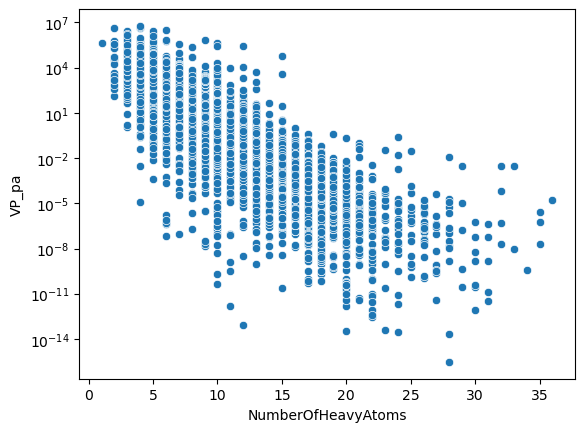

In [156]:
from rdkit import Chem
df_ochem['NumberOfHeavyAtoms'] = df_ochem.apply(lambda row: Chem.MolFromSmiles(row['standardized_smiles']).GetNumHeavyAtoms(), axis=1)
#plot NumberOfHeavyAtoms against VP_pa
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df_ochem, x='NumberOfHeavyAtoms', y='VP_pa')
#yscale('log')
plt.yscale('log')
plt.show()


In [170]:
df_ochem['standardized_smiles'].value_counts()
#count number of duplicates
df_ochem['standardized_smiles'].value_counts().value_counts()

count
1    1842
2     852
3      49
4      12
5       3
7       1
6       1
Name: count, dtype: int64

In [168]:
import numpy as np
print(len(df_ochem))
df_ochem_test = df_ochem.copy()
def filter_rows(group):
    # Check if the difference in column_y is greater than 1 order of magnitude
    if (group['VP_pa'].max() / group['VP_pa'].min()) > 10:
        # If yes, remove all entries
        return pd.DataFrame(columns=group.columns)
    else:
        # Otherwise, keep only one entry
        return group.head(1)

# Apply the function to each group of rows with the same value in column_x
result_df = df_ochem_test.groupby('standardized_smiles', group_keys=False).apply(filter_rows)
print(len(result_df))
result_df

3769
1876


/tmp/ipykernel_4064838/1196644802.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = df_ochem_test.groupby('standardized_smiles', group_keys=False).apply(filter_rows)


,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms
1503,1503,Br\C=C\Br,31.0000,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,5a7bab28cb35beedc4d5ff69110f31e1,NaN,298.15,31.000000,Br/C=C/Br,4
1567,1567,BrC(Br)(Br)Br,0.2700,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,eaa86fa2d8031219b916d3d77544bc87,NaN,298.15,0.270000,BrC(Br)(Br)Br,5
434,434,BrC(Br)Br,5.4000,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,12119676ad112e3893a68c348e8f5c9c,NaN,298.15,5.400000,BrC(Br)Br,4
3607,3607,BrC=CBr,3.6200,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,d02fca678711a1e59ae6a964334ad550,NaN,298.15,4168.693835,BrC=CBr,4
634,634,BrCC(Br)C1=CC=CC=C1,0.0106,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,7a18ee20bb7bf75e6a81edc9ab7f488c,"[10, 2, 0, 0, 0, 0, 0, 0, 2, 0, 6.666453772846...",298.15,0.010600,BrCC(Br)c1ccccc1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2998,C1=CC=CC=C1,4.1000,log(Pa),298.15,K,NaN,NaN,NaN,NaN,NaN,-,Test,NaN,-,60c5fa2eb3046aca250f27ede97fbe7a,NaN,298.15,12589.254118,c1ccccc1,6
1343,1343,C1=CN=CC=N1,10.8060,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,5b6694cf1b13b0c2534797f1e7371c69,NaN,298.15,10.806000,c1cnccn1,6
1340,1340,O1C=CC=N1,45.4580,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,738aa423baa5082a0d5e6e7c9a1f197c,NaN,298.15,45.458000,c1cnoc1,5
1341,1341,O1C=CN=C1,132.0000,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,-,1e05a526b9492b1dadbe0d19551b1125,NaN,298.15,132.000000,c1cocn1,5


/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/localhome/cschiebroek/.conda/envs/mdfp_carl/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


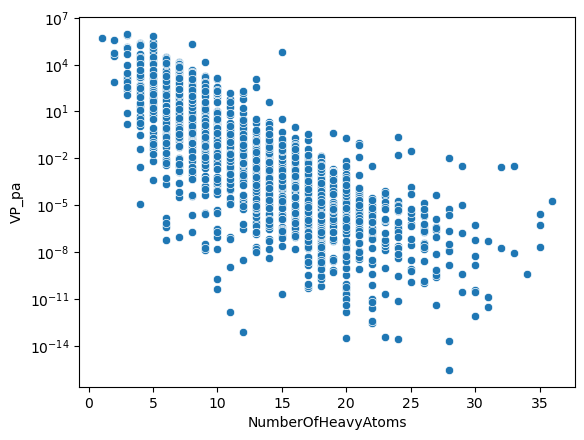

In [158]:
sns.scatterplot(data=result_df, x='NumberOfHeavyAtoms', y='VP_pa')
#yscale('log')
plt.yscale('log')
plt.show()

In [159]:
#check for negative values
result_df[result_df['VP_pa'] < 0]

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,# of ortho chlorides,UNIT {# of ortho chlorides},Dataset,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms


In [160]:
mols = [Chem.MolFromSmiles(smiles) for smiles in result_df['standardized_smiles']]
from rdkit.Chem.Descriptors import CalcMolDescriptors
MolDescriptors_vectors_ = [list(CalcMolDescriptors(m).values()) for m in mols]

In [161]:
RDKit_feature_names = pd.read_pickle('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/outputs/RDKit_2D_descriptors.pkl')
#put into dataframe, add VP_pa
df_RDKit = pd.DataFrame(MolDescriptors_vectors_, columns=RDKit_feature_names)
df_RDKit['vp_pa'] = result_df['VP_pa'].values
#make log10(vp)
df_RDKit['vp'] = np.log10(df_RDKit['vp_pa'])

In [162]:
#check for nan in vp
df_RDKit[df_RDKit['vp'].isnull()]
#drop 

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,vp_pa,vp


In [163]:
df_RDKit

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,vp_pa,vp
0,3.020833,3.020833,1.729167,1.729167,0.543500,185.846,183.830,183.852324,24,0,-0.011958,-0.058922,0.058922,0.011958,1.000000,1.25,1.250000,79.919910,11.289348,1.388090,-1.441452,1.855434,-1.072567,9.131995,2.646952,1.370951,2.549193,19.219281,3.414214,1.910629,5.082623,1.914214,0.769769,2.601120,0.251976,1.309307,0.047619,1.285714,0.000000,0.000000,0.70,6.854753,4.700000,3.700000,2.700000,42.149685,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,31.859888,9.970576,0.000000,0.000000,0.000000,31.859888,0.0,0.000000,0.0,0.000000,0.00000,9.970576,0.0,0.0,0.0,0.0,0.0,31.859888,0.000000,0.0,0.0,0.000000,9.970576,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,9.970576,0.000000,31.859888,0.0,0.000000,6.041667,3.458333,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2.2474,26.994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31.000000,1.491362
1,3.125000,3.125000,0.250000,-0.250000,0.598169,331.627,331.627,327.673348,32,0,0.188533,-0.047133,0.188533,0.047133,0.800000,0.80,0.800000,79.965863,11.952137,2.075580,-1.931181,2.389979,-1.746479,9.519253,2.141747,0.721928,3.023716,19.119415,4.500000,2.011858,8.355844,2.000000,0.755929,3.927922,0.428571,11.571429,0.000000,0.000000,0.000000,0.000000,1.92,3.609640,6.920000,2.284555,24.676944,64.209441,0.000000,0.000000,1.052063,0.0,0.0,0.0,0.000000,0.000000,0.

In [164]:
import sys
sys.path.append('../..')
from carl import utils_carl
from carl.utils_carl import train_pred_xgboost_2d, getStatValues,density_plot, get_mdfps
from functools import reduce
params = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': 6,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    "objective" : 'reg:squarederror',
}
#load X features: carl/RDKit_2D_descriptors.pkl
output_2d_only = train_pred_xgboost_2d(df_RDKit,params=params,X_features=RDKit_feature_names,y_label='vp')
real_2d_only, prediction_2d_only = (reduce(lambda a,b : list(a)+list(b) , output_2d_only[0]), reduce(lambda a,b : list(a)+list(b), output_2d_only[1]))


RMSE:  1.8716909908194292
MAE:  1.3992364943473166
R2:  0.7262491192151804


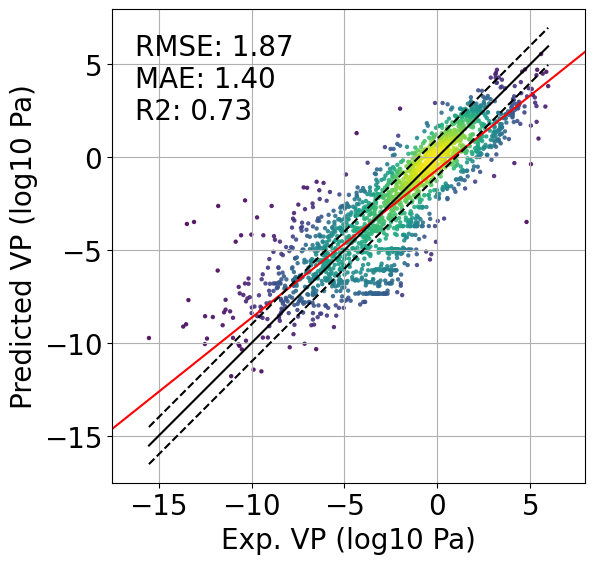

In [165]:
density_plot(real_2d_only, prediction_2d_only)